In [36]:
from xml.etree.ElementTree import parse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc

import random

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
# font_location = "C:\Windows\Fonts\malgun.ttf"
# font_name = font_manager.FontProperties(fname=font_location).get_name()
# rc('font',family=font_name)
# plt.rcParams['axes.unicode_minus'] = False

In [12]:
def get_record_column_names(items):
    for item in items.iter("record"):
        column_list = []
        is_first = True
        for column_data in item.iter():
            if is_first:
                is_first = False
                continue
            column_list.append(column_data.tag)

        return column_list

def get_all_records(items):

    all_records = []
    for item in items.iter("record"):

        simple_row_list=[] # 행 데이터

        is_first = True
        for column_data in item.iter():
            if is_first:
                is_first = False
                continue
            simple_row_list.append(column_data.text)
        all_records.append(simple_row_list)

    return all_records


tree = parse("전국대학별등록금정보표준데이터.xml")
response = tree.getroot()
items = response.find('records')



print(get_record_column_names(items))

all_records = get_all_records(items)
column_list = get_record_column_names(items)
#print(all_records)
#print(column_list)
df = pd.DataFrame(all_records, columns=column_list)
#df.to_csv('전국대학별등록금정보표준데이터.csv', encoding='cp949', index=False)

['기준연도', '시도코드', '시도명', '대학구분명', '대학교명', '본분교구분명', '설립형태구분명', '평균입학금액', '평균등록금액', '데이터기준일자', '제공기관코드', '제공기관명']


In [13]:
df.head()

,기준연도,시도코드,시도명,대학구분명,대학교명,본분교구분명,설립형태구분명,평균입학금액,평균등록금액,데이터기준일자,제공기관코드,제공기관명
0,2022,41,경기도,대학,가톨릭대학교,본교,사립,176000,6997600,2022-11-22,B552529,한국장학재단
1,2022,30,대전광역시,대학,목원대학교,본교,사립,0,7271240.2,2022-11-22,B552529,한국장학재단
2,2022,11,서울특별시,대학,감리교신학대학교,본교,사립,165400,6304000,2022-11-22,B552529,한국장학재단
3,2022,41,경기도,대학,강남대학교,본교,사립,178000,7464484.2,2022-11-22,B552529,한국장학재단
4,2022,11,서울특별시,대학,건국대학교,본교,사립,187000,8275634.2,2022-11-22,B552529,한국장학재단


In [14]:
df.shape

(923, 12)

In [15]:
df.tail()

,기준연도,시도코드,시도명,대학구분명,대학교명,본분교구분명,설립형태구분명,평균입학금액,평균등록금액,데이터기준일자,제공기관코드,제공기관명
918,2022,47,경상북도,전문대학,동국대학교(WISE),분교,사립,0,0,2022-11-22,B552529,한국장학재단
919,2022,36,세종특별자치시,전문대학,고려대학교(세종),분교,사립,1234000,13144000,2022-11-22,B552529,한국장학재단
920,2022,11,서울특별시,전문대학,가톨릭대학교,제2캠퍼,사립,0,0,2022-11-22,B552529,한국장학재단
921,2022,11,서울특별시,전문대학,명지대학교,제2캠퍼,사립,930000,12616000,2022-11-22,B552529,한국장학재단
922,2022,42,강원도,전문대학,강원대학교,제2캠퍼,국립,178000,5492000,2022-11-22,B552529,한국장학재단


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   기준연도     923 non-null    object
 1   시도코드     923 non-null    object
 2   시도명      923 non-null    object
 3   대학구분명    923 non-null    object
 4   대학교명     923 non-null    object
 5   본분교구분명   923 non-null    object
 6   설립형태구분명  923 non-null    object
 7   평균입학금액   923 non-null    object
 8   평균등록금액   923 non-null    object
 9   데이터기준일자  923 non-null    object
 10  제공기관코드   923 non-null    object
 11  제공기관명    923 non-null    object
dtypes: object(12)
memory usage: 86.7+ KB


In [17]:
df.isnull().sum()

기준연도       0
시도코드       0
시도명        0
대학구분명      0
대학교명       0
본분교구분명     0
설립형태구분명    0
평균입학금액     0
평균등록금액     0
데이터기준일자    0
제공기관코드     0
제공기관명      0
dtype: int64

In [18]:
df.columns

Index(['기준연도', '시도코드', '시도명', '대학구분명', '대학교명', '본분교구분명', '설립형태구분명', '평균입학금액',
       '평균등록금액', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

## 전처리 작업: 입학금과 등록금이 object 타입이므로 float타입으로 변경

In [19]:
df["평균입학금액"]=df["평균입학금액"].astype('float')
df["평균등록금액"]=df["평균등록금액"].astype('float')

In [20]:
df.dtypes

기준연도        object
시도코드        object
시도명         object
대학구분명       object
대학교명        object
본분교구분명      object
설립형태구분명     object
평균입학금액     float64
평균등록금액     float64
데이터기준일자     object
제공기관코드      object
제공기관명       object
dtype: object

In [21]:
df['데이터기준일자'].unique()

array(['2022-11-22'], dtype=object)

In [22]:
df['제공기관코드'].unique()

array(['B552529'], dtype=object)

In [23]:
df['제공기관명'].unique()

array(['한국장학재단'], dtype=object)

In [24]:
df.drop(['데이터기준일자','제공기관코드','제공기관명'],axis=1)

,기준연도,시도코드,시도명,대학구분명,대학교명,본분교구분명,설립형태구분명,평균입학금액,평균등록금액
0,2022,41,경기도,대학,가톨릭대학교,본교,사립,176000.0,6997600.0
1,2022,30,대전광역시,대학,목원대학교,본교,사립,0.0,7271240.2
2,2022,11,서울특별시,대학,감리교신학대학교,본교,사립,165400.0,6304000.0
3,2022,41,경기도,대학,강남대학교,본교,사립,178000.0,7464484.2
4,2022,11,서울특별시,대학,건국대학교,본교,사립,187000.0,8275634.2
...,...,...,...,...,...,...,...,...,...
918,2022,47,경상북도,전문대학,동국대학교(WISE),분교,사립,0.0,0.0
919,2022,36,세종특별자치시,전문대학,고려대학교(세종),분교,사립,1234000.0,13144000.0
920,2022,11,서울특별시,전문대학,가톨릭대학교,제2캠퍼,사립,0.0,0.0
921,2022,11,서울특별시,전문대학,명지대학교,제2캠퍼,사립,930000.0,12616000.0


In [25]:
round(df.describe(),2)

,평균입학금액,평균등록금액
count,923.00,923.00
mean,374370.22,7035567.09
std,359788.14,3290629.18
min,0.00,0.00
25%,0.00,5458044.50
50%,204000.00,6682805.20
75%,700000.00,8448630.80
max,1360232.80,46650000.00


## 1차 탐색적 분석
### Step1            
#### 데이터 분석의 목적, 대상 또는 가설을 세운다.
* 전국 지역별 국립대가 사립대보다 등록금이 더 낮을 것이다.
* 입학금을 안내는 대학은 등록금도 낮을 것이다.
* 본캠퍼스외 다른캠퍼스는 등록금이 더 낮을 것이다.
* 지방대비 수도권에 대학이 더 많을 것이다.
* 국립대는 지방에 더 많이 있을 것이다.
* 수도권 대학이 지방권 대학보다 등록금이 더 비쌀것이다.

## 1. 전국 지역별 국립대가 사립대보다 등록금이 더 낮을 것이다.

In [26]:
college = pd.pivot_table(df,
                        index = '시도명', 
                         columns = '설립형태구분명', 
                         values = '평균등록금액',
                        aggfunc = 'mean')

college=round(college,2)
college

설립형태구분명,공립,국립,사립
시도명,,,
강원도,2335984.70,4865566.09,7222727.90
경기도,NaN,4616986.80,7801801.30
경상남도,2801955.70,3738750.98,6276719.36
경상북도,2444101.50,4127703.23,6903172.98
광주광역시,NaN,5117306.32,6381798.70
대구광역시,NaN,5966939.55,5506535.05
대전광역시,NaN,6855268.51,6755796.19
부산광역시,NaN,4904070.26,6449481.92
서울특별시,5574479.43,5530232.42,8792396.48


In [27]:
college=college.fillna(0)

In [28]:
college

설립형태구분명,공립,국립,사립
시도명,,,
강원도,2335984.70,4865566.09,7222727.90
경기도,0.00,4616986.80,7801801.30
경상남도,2801955.70,3738750.98,6276719.36
경상북도,2444101.50,4127703.23,6903172.98
광주광역시,0.00,5117306.32,6381798.70
대구광역시,0.00,5966939.55,5506535.05
대전광역시,0.00,6855268.51,6755796.19
부산광역시,0.00,4904070.26,6449481.92
서울특별시,5574479.43,5530232.42,8792396.48


In [29]:
df2=round(df.groupby('시도명').mean(),2)
df2

,평균입학금액,평균등록금액
시도명,,
강원도,253127.30,6264533.37
경기도,433424.46,7677717.61
경상남도,191056.82,5426602.36
경상북도,376616.50,6604580.98
광주광역시,270939.31,6122415.65
대구광역시,190310.75,5681927.24
대전광역시,325653.03,6778403.53
부산광역시,279108.28,6076451.52
서울특별시,573421.71,8489435.06


In [30]:
college['전체']=df2['평균등록금액']

In [31]:
college

설립형태구분명,공립,국립,사립,전체
시도명,,,,
강원도,2335984.70,4865566.09,7222727.90,6264533.37
경기도,0.00,4616986.80,7801801.30,7677717.61
경상남도,2801955.70,3738750.98,6276719.36,5426602.36
경상북도,2444101.50,4127703.23,6903172.98,6604580.98
광주광역시,0.00,5117306.32,6381798.70,6122415.65
대구광역시,0.00,5966939.55,5506535.05,5681927.24
대전광역시,0.00,6855268.51,6755796.19,6778403.53
부산광역시,0.00,4904070.26,6449481.92,6076451.52
서울특별시,5574479.43,5530232.42,8792396.48,8489435.06


In [32]:
college.sort_values(by='전체',ascending=0)

설립형태구분명,공립,국립,사립,전체
시도명,,,,
울산광역시,0.00,9136729.15,12366511.29,11192045.05
세종특별자치시,0.00,0.00,9722058.14,9722058.14
서울특별시,5574479.43,5530232.42,8792396.48,8489435.06
경기도,0.00,4616986.80,7801801.30,7677717.61
인천광역시,0.00,5212607.63,7526810.79,6923105.62
대전광역시,0.00,6855268.51,6755796.19,6778403.53
경상북도,2444101.50,4127703.23,6903172.98,6604580.98
충청남도,2454454.20,3703201.30,7106174.78,6492183.42
충청북도,1868046.50,4674791.99,7472330.27,6431171.67


In [33]:
college=college[['전체','공립','국립','사립']]

In [34]:
college

설립형태구분명,전체,공립,국립,사립
시도명,,,,
강원도,6264533.37,2335984.70,4865566.09,7222727.90
경기도,7677717.61,0.00,4616986.80,7801801.30
경상남도,5426602.36,2801955.70,3738750.98,6276719.36
경상북도,6604580.98,2444101.50,4127703.23,6903172.98
광주광역시,6122415.65,0.00,5117306.32,6381798.70
대구광역시,5681927.24,0.00,5966939.55,5506535.05
대전광역시,6778403.53,0.00,6855268.51,6755796.19
부산광역시,6076451.52,0.00,4904070.26,6449481.92
서울특별시,8489435.06,5574479.43,5530232.42,8792396.48


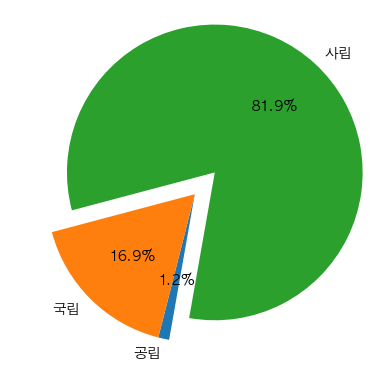

In [37]:
index=df.groupby('설립형태구분명')['대학교명'].count().index
data=df.groupby('설립형태구분명')['대학교명'].count().values
explode = [0, 0, 0.2]
plt.pie(data, labels=index, autopct='%.1f%%', startangle=260, counterclock=False,explode=explode)
plt.show()

In [38]:
college=college.replace('없음',0)
college1=college[['공립','국립','사립']]
college2=college[['전체']]

In [39]:
college2

설립형태구분명,전체
시도명,
강원도,6264533.37
경기도,7677717.61
경상남도,5426602.36
경상북도,6604580.98
광주광역시,6122415.65
대구광역시,5681927.24
대전광역시,6778403.53
부산광역시,6076451.52
서울특별시,8489435.06


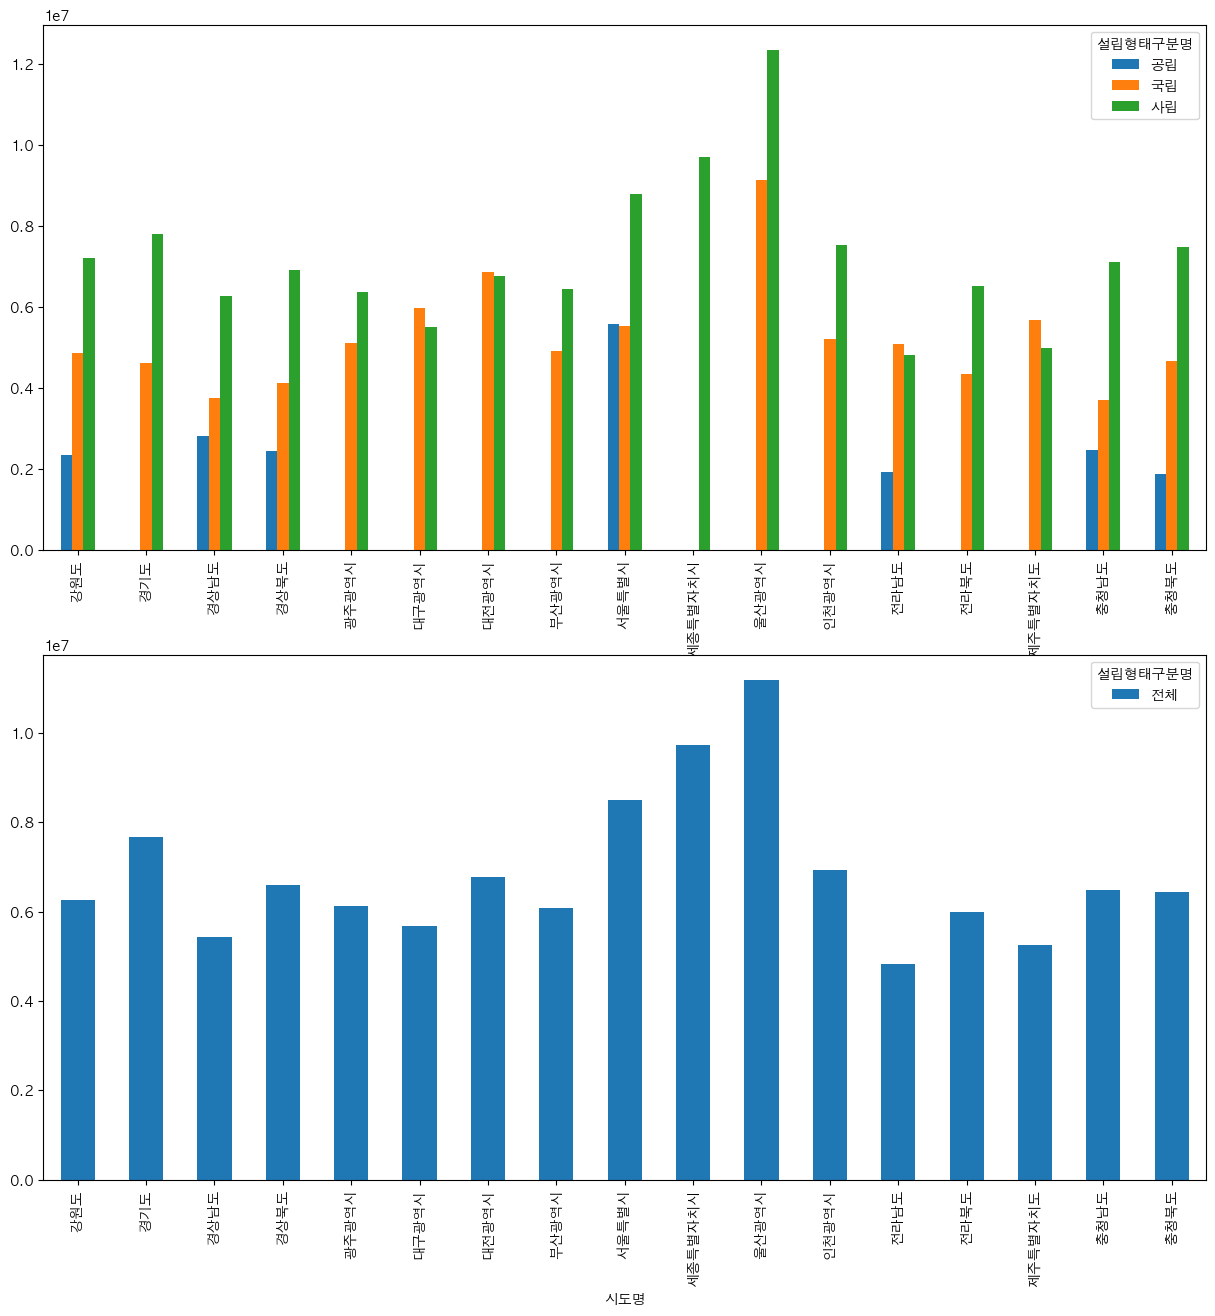

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title="시도별 국공립별 평균 등록금"
fig,ax = plt.subplots(2,1)
college1.plot(kind='bar',figsize=(15,15), ax = ax[0])
college2.plot(kind='bar',figsize=(15,15), ax = ax[1])
plt.show()

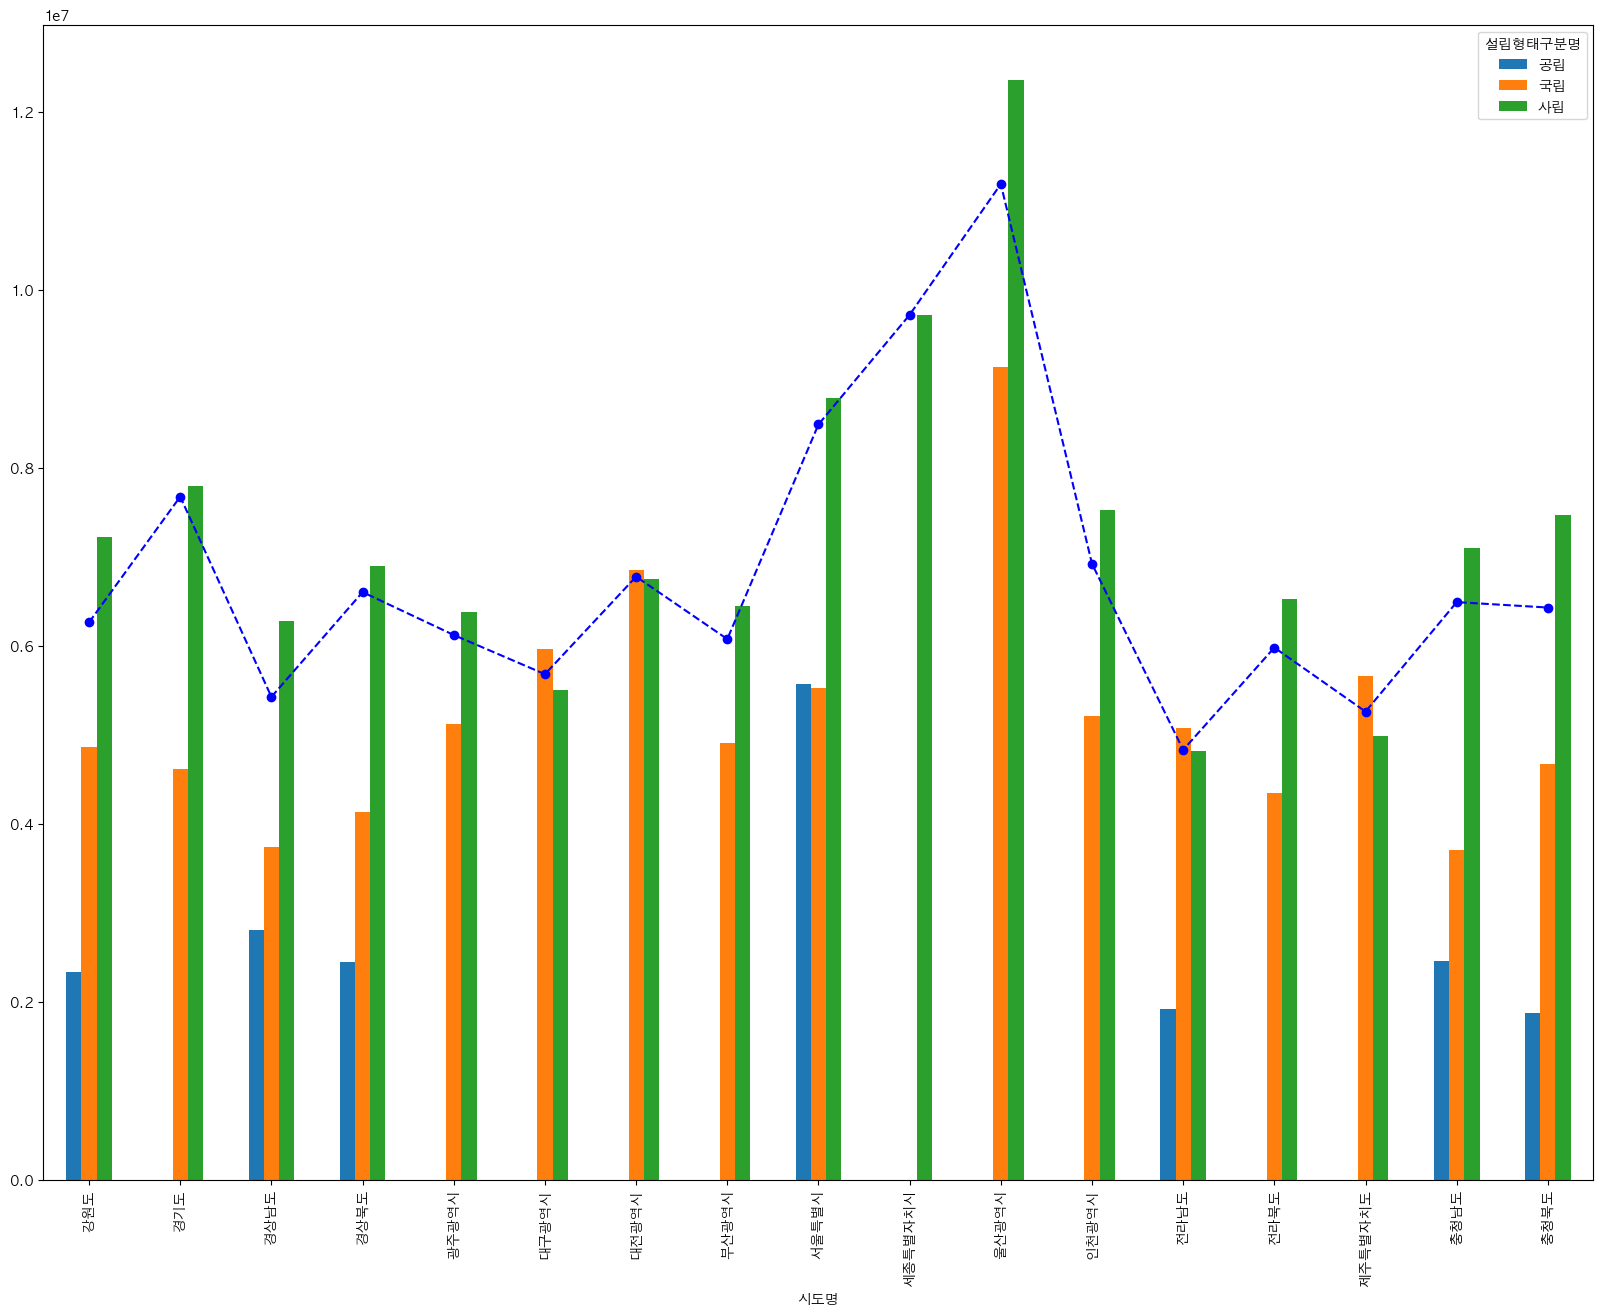

In [41]:
plt.title="시도별 국공립별 평균 등록금"
college1.plot(kind='bar',figsize=(20,15))
plt.plot(college2.index, college2.values,color='b',linestyle='--',marker='o')
plt.show()

### 1.결과 : 대구,대전,전남,제주는 국립대 등록금평균이 더 높게 나왔다.    

---

## 2. 입학금이 없는 대학은 등록금도 낮을 것이다.

In [142]:
zero_entrance = df.loc[(df['평균입학금액'] == 0)]

zero_entrance.head()

,기준연도,시도코드,시도명,대학구분명,대학교명,본분교구분명,설립형태구분명,평균입학금액,평균등록금액,데이터기준일자,제공기관코드,제공기관명
1,2022,30,대전광역시,대학,목원대학교,본교,사립,0.0,7271240.2,2022-11-22,B552529,한국장학재단
5,2022,44,충청남도,대학,건양대학교,본교,사립,0.0,6402437.2,2022-11-22,B552529,한국장학재단
6,2022,41,경기도,대학,경기대학교,본교,사립,0.0,7350206.6,2022-11-22,B552529,한국장학재단
9,2022,27,대구광역시,대학,계명대학교,본교,사립,0.0,7246635.7,2022-11-22,B552529,한국장학재단
11,2022,26,부산광역시,대학,고신대학교,본교,사립,0.0,6648450.8,2022-11-22,B552529,한국장학재단


In [143]:
zero_entrance = zero_entrance['평균등록금액'].mean()

zero_entrance

4995378.3118143445

In [144]:
entrance = df.loc[(df['평균입학금액'] != 0)]

entrance.head()

,기준연도,시도코드,시도명,대학구분명,대학교명,본분교구분명,설립형태구분명,평균입학금액,평균등록금액,데이터기준일자,제공기관코드,제공기관명
0,2022,41,경기도,대학,가톨릭대학교,본교,사립,176000.0,6997600.0,2022-11-22,B552529,한국장학재단
2,2022,11,서울특별시,대학,감리교신학대학교,본교,사립,165400.0,6304000.0,2022-11-22,B552529,한국장학재단
3,2022,41,경기도,대학,강남대학교,본교,사립,178000.0,7464484.2,2022-11-22,B552529,한국장학재단
4,2022,11,서울특별시,대학,건국대학교,본교,사립,187000.0,8275634.2,2022-11-22,B552529,한국장학재단
7,2022,42,강원도,대학,경동대학교,본교,사립,156000.0,6571361.0,2022-11-22,B552529,한국장학재단


In [145]:
entrance = entrance['평균등록금액'].mean()

entrance

7740413.651603501

In [146]:
result = pd.DataFrame({'입학금 X': [zero_entrance], 
                      '입학금 O': [entrance]}, index = ['평균등록금액'])

In [147]:
round(result,2)

,입학금 X,입학금 O
평균등록금액,4995378.31,7740413.65


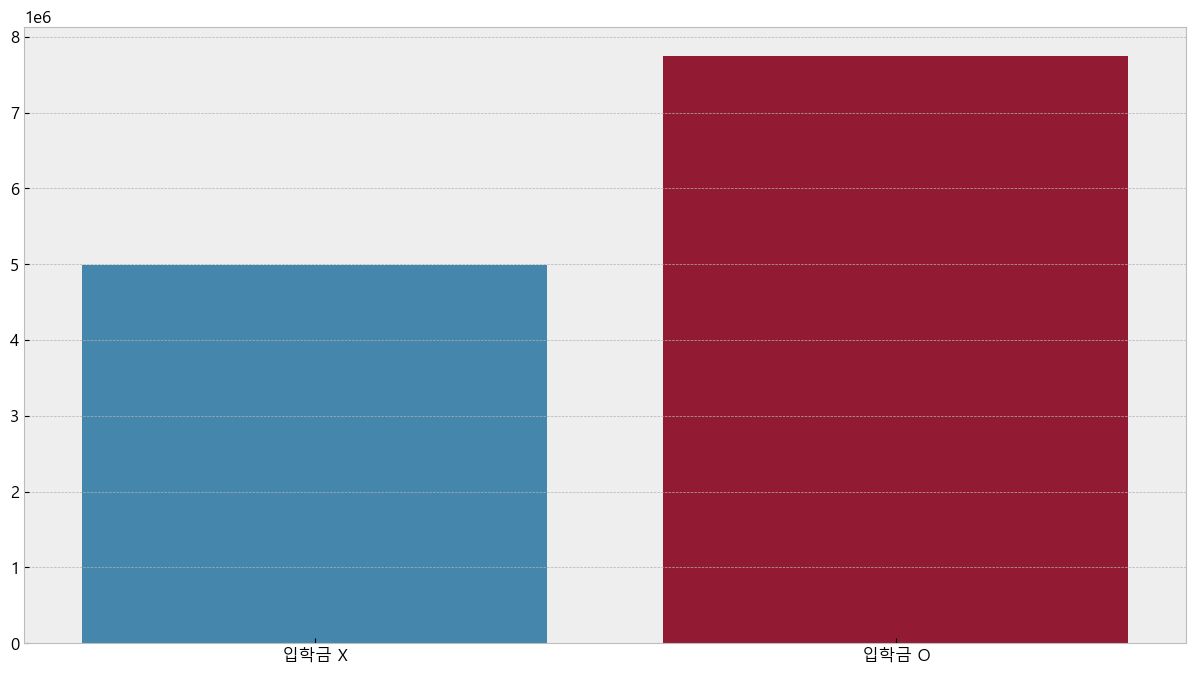

In [148]:
#plt.title("입학금 유무에 따른 평균 등록금액")
plt.style.use('bmh')
sns.barplot(data = result)

plt.show()

## 2. 결과: 입학금이 없는 대학은 등록금도 평균적으로 낮다

---

## 3. 본캠퍼스외 다른 캠퍼스는 등록금이 낮을 것이다

In [149]:
college_campus = df.loc[(df['본분교구분명'] == '본교')]

college_campus

,기준연도,시도코드,시도명,대학구분명,대학교명,본분교구분명,설립형태구분명,평균입학금액,평균등록금액,데이터기준일자,제공기관코드,제공기관명
0,2022,41,경기도,대학,가톨릭대학교,본교,사립,176000.0,6997600.0,2022-11-22,B552529,한국장학재단
1,2022,30,대전광역시,대학,목원대학교,본교,사립,0.0,7271240.2,2022-11-22,B552529,한국장학재단
2,2022,11,서울특별시,대학,감리교신학대학교,본교,사립,165400.0,6304000.0,2022-11-22,B552529,한국장학재단
3,2022,41,경기도,대학,강남대학교,본교,사립,178000.0,7464484.2,2022-11-22,B552529,한국장학재단
4,2022,11,서울특별시,대학,건국대학교,본교,사립,187000.0,8275634.2,2022-11-22,B552529,한국장학재단
...,...,...,...,...,...,...,...,...,...,...,...,...
912,2022,45,전라북도,전문대학,전북대학교,본교,국립,178000.0,9393278.6,2022-11-22,B552529,한국장학재단
913,2022,47,경상북도,전문대학,안동대학교,본교,국립,173400.0,4949000.0,2022-11-22,B552529,한국장학재단
914,2022,48,경상남도,전문대학,경상국립대학교,본교,국립,0.0,0.0,2022-11-22,B552529,한국장학재단
915,2022,50,제주특별자치도,전문대학,제주대학교,본교,국립,189153.8,9487333.4,2022-11-22,B552529,한국장학재단


In [150]:
college_campus = college_campus['평균등록금액'].mean()

college_campus

6887906.313684217

In [151]:
other_college_campus = df.loc[(df['본분교구분명'] == '분교') | (df['본분교구분명'] == '제2캠퍼') | (df['본분교구분명'] == '제3캠퍼')]

other_college_campus

,기준연도,시도코드,시도명,대학구분명,대학교명,본분교구분명,설립형태구분명,평균입학금액,평균등록금액,데이터기준일자,제공기관코드,제공기관명
161,2022,43,충청북도,대학,건국대학교(글로컬),분교,사립,187000.0,8007679.9,2022-11-22,B552529,한국장학재단
162,2022,36,세종특별자치시,대학,고려대학교(세종),분교,사립,197000.0,8399249.1,2022-11-22,B552529,한국장학재단
163,2022,47,경상북도,대학,동국대학교(WISE),분교,사립,179200.0,7878738.5,2022-11-22,B552529,한국장학재단
164,2022,44,충청남도,대학,상명대학교,제2캠퍼,사립,178000.0,8101506.0,2022-11-22,B552529,한국장학재단
165,2022,42,강원도,대학,연세대학교(미래),분교,사립,195000.0,8451261.6,2022-11-22,B552529,한국장학재단
...,...,...,...,...,...,...,...,...,...,...,...,...
918,2022,47,경상북도,전문대학,동국대학교(WISE),분교,사립,0.0,0.0,2022-11-22,B552529,한국장학재단
919,2022,36,세종특별자치시,전문대학,고려대학교(세종),분교,사립,1234000.0,13144000.0,2022-11-22,B552529,한국장학재단
920,2022,11,서울특별시,전문대학,가톨릭대학교,제2캠퍼,사립,0.0,0.0,2022-11-22,B552529,한국장학재단
921,2022,11,서울특별시,전문대학,명지대학교,제2캠퍼,사립,930000.0,12616000.0,2022-11-22,B552529,한국장학재단


In [152]:
other_college_campus = other_college_campus['평균등록금액'].mean()

other_college_campus

8911309.892537313

In [153]:
result_campus = pd.DataFrame({'본교': [college_campus], 
                      '본교 외 캠퍼스': [other_college_campus]}, index = ['평균등록금액'])

result_campus

,본교,본교 외 캠퍼스
평균등록금액,6.887906e+06,8.911310e+06


In [154]:
result_campus = round(result_campus,2)

result_campus

,본교,본교 외 캠퍼스
평균등록금액,6887906.31,8911309.89


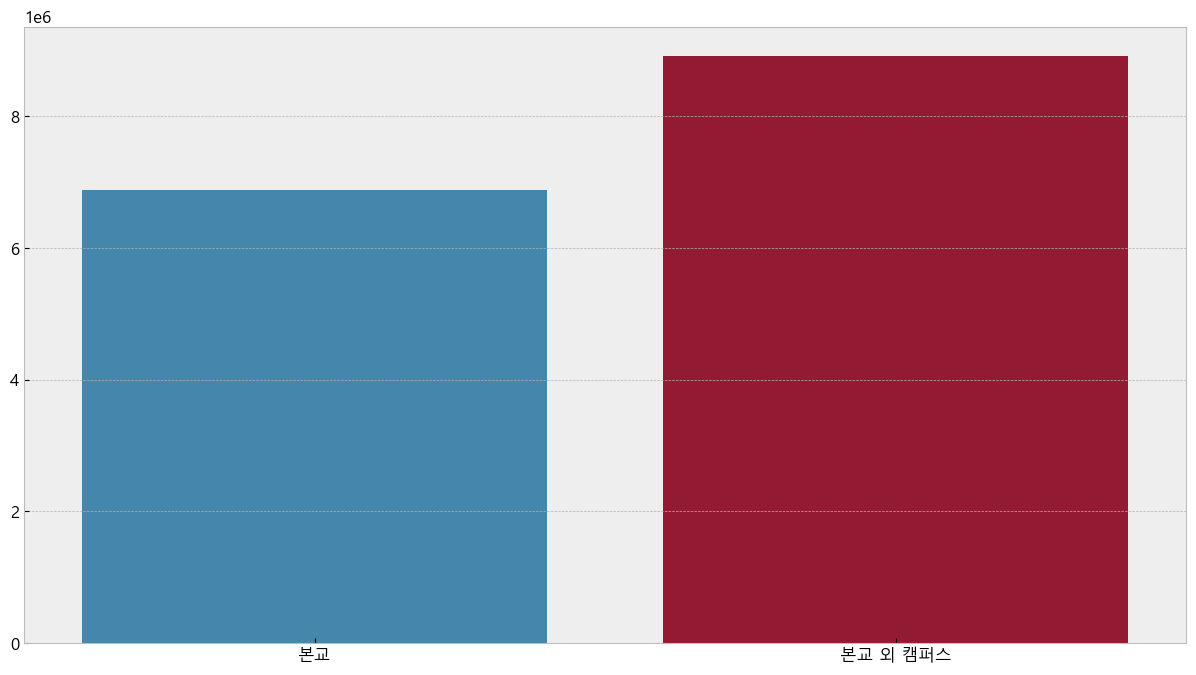

In [155]:
# plt.style.use('default')
sns.barplot(data = result_campus)

plt.show()

## 도별 등록금

In [156]:
df_gyeonggi=df.loc[df['시도명']=='경기도','평균등록금액']
df_daejeon=df.loc[df['시도명']=='대전광역시','평균등록금액']
df_seoul=df.loc[df['시도명']=='서울특별시','평균등록금액']
df_chungnam=df.loc[df['시도명']=='충청남도','평균등록금액']
df_gangwon=df.loc[df['시도명']=='강원도','평균등록금액']
df_daegu=df.loc[df['시도명']=='대구광역시','평균등록금액']
df_busan=df.loc[df['시도명']=='부산광역시','평균등록금액']
df_gwangju=df.loc[df['시도명']=='광주광역시','평균등록금액']
df_chungbuk=df.loc[df['시도명']=='충청북도','평균등록금액']
df_jeonnam=df.loc[df['시도명']=='전라남도','평균등록금액']
df_gyeongbuk=df.loc[df['시도명']=='경상북도','평균등록금액']
df_seojeong=df.loc[df['시도명']=='세종특별자치시','평균등록금액']
df_gyeongnam=df.loc[df['시도명']=='경상남도','평균등록금액']
df_jeonbuk=df.loc[df['시도명']=='전라북도','평균등록금액']
df_ulsan=df.loc[df['시도명']=='울산광역시','평균등록금액']
df_incheon=df.loc[df['시도명']=='인천광역시','평균등록금액']
df_jeju=df.loc[df['시도명']=='제주특별자치도','평균등록금액']

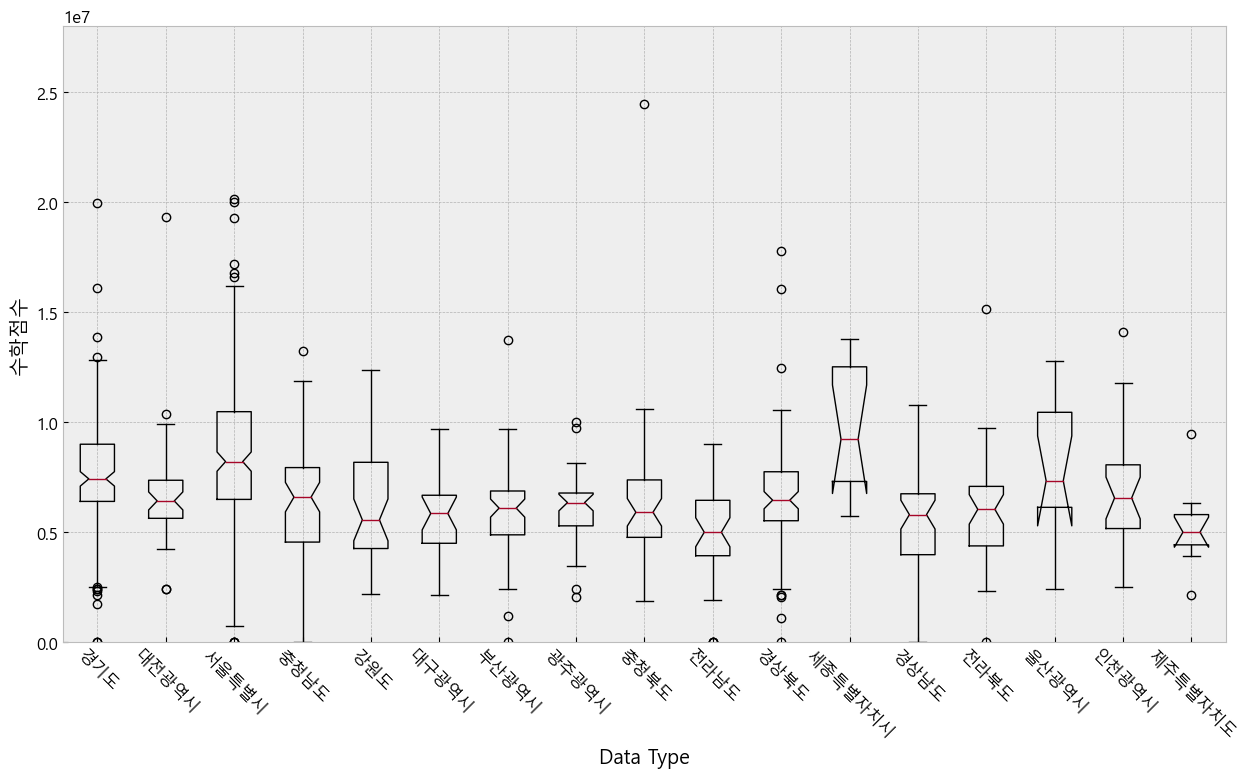

In [157]:
# 1. 기본 스타일 설정
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 12


# 3. 그래프 그리기
fig, ax = plt.subplots()


# notch=True
# 중앙값을 강조
ax.boxplot([df_gyeonggi, df_daejeon, df_seoul,df_chungnam,df_gangwon,df_daegu,df_busan,df_gwangju,df_chungbuk,df_jeonnam,df_gyeongbuk,df_seojeong,df_gyeongnam,df_jeonbuk,df_ulsan,df_incheon,df_jeju], notch=True)
ax.set_ylim(-100, 28000000)
ax.set_xticklabels(df['시도명'].unique())
plt.xticks(rotation=-45)
ax.set_xlabel('Data Type')
ax.set_ylabel('수학점수')


plt.show()